# Sheet 2: Linear Discriminant Analysis

In [1]:
# insert figures in the notebook itself
%matplotlib inline 

import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# set printing of matrices to 3 decimal places for clarity
# this doesn't change the values stored inside the matrices
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [4]:
# a method to convert an np array/matrix to latex format
def to_latex_mat(np_matrix, command='bmatrix'):
    result = ""
    result += "\\begin{" + command + "}"
    for row in range(0,np_matrix.shape[0]):
        string = " & ".join(map(str,np_matrix[row]))
        result += "{} \\\\".format(string)
    result += "\end{" + command + "}"
    return result

## Orthogonal Projection

$$ u_1 = \begin{bmatrix}
3 \\ 4 \\ 0
\end{bmatrix}
$$
$$ u_2 = \begin{bmatrix}
-4 \\ 3 \\ 0
\end{bmatrix}
$$

$$ u_1 \cdot u_2 = 3 \times -4 + 4 \times 3 + 0 \times 0 = 0 $$
The dot product of $u_1$ and $u_2$ is $0$ so the vectors are orthogonal (The projection of $u_1$ on $u_2$ is nothing)

$$ y = \begin{bmatrix}
6 \\ 3 \\ -2
\end{bmatrix}
$$

The projection of $y$ on $u_1$ is

$$ \frac{u_1^Ty}{u_1^Tu_1}u_1 = \frac{3 \times 6 + 4 \times 3 + 0 \times -2}{3^2 + 4^2 + 0^2} \begin{bmatrix}
3 \\ 4 \\ 0 
\end{bmatrix}
= \begin{bmatrix} \frac{18}{5} \\ \frac{24}{5} \\ 0\end{bmatrix}
$$

and similarly the projection of $y$ on $u_2$ is
$$
\frac{-4 \times 6 + 3 \times 3 + 0 \times -2}{(-4)^2 + 3^2 + 0^2} \begin{bmatrix}
-4 \\ 3 \\ 0
\end{bmatrix} = \begin{bmatrix}
2.4 \\ -1.8  \\ 0
\end{bmatrix}
$$


## Linear Discriminant Analysis

$$Class_{-1} = \begin{bmatrix}
2 & 3 \\
3 & 3 \\
3 & 4 \\
7 & 7 \\
5 & 8
\end{bmatrix}
Class_1 = \begin{bmatrix}
5 & 4 \\
6 & 5 \\
7 & 5 \\
7 & 4 \\
9 & 4 \\
8 & 2
\end{bmatrix}$$

$$u_{-1} = \begin{bmatrix}
4 \\ 5
\end{bmatrix}$$

$$u_1 = \begin{bmatrix}
7 \\ 4
\end{bmatrix}$$

The between class scatter matrix $B$ is
$$
(u_{-1} - u_1)(u_{-1} - u_{1})^T = \begin{bmatrix}-3 \\ 1 \end{bmatrix} \begin{bmatrix}-3 & 1\end{bmatrix} = \begin{bmatrix}9 & -3 \\ -3 & 1\end{bmatrix}
$$

In [5]:
s_inv = np.array([[0.056, -0.029], [-0.029, 0.052]])
B = np.array([[9, -3], [-3, 1]])

In [6]:
eigenvalues, eigenvectors = linalg.eig( s_inv.dot(B))
print eigenvalues
print eigenvectors

[0.730 -0.000]
[[0.817 0.316]
 [-0.577 0.949]]


Given that

$$ S^{-1} = \begin{bmatrix}0.56 & -0.029 \\ -0.029 & 0.052\end{bmatrix}$$

Therefore we have that

$$S^{-1}B = \begin{bmatrix}0.56 & -0.029 \\ -0.029 & 0.052\end{bmatrix} \begin{bmatrix}9 & -3 \\ -3 & 1\end{bmatrix} = \begin{bmatrix}0.591 & -0.197 \\-0.417 & 0.139 \\\end{bmatrix} $$

using Python solvers, the eigenvector (i.e the best direction $w$ that discriminates between the classes) is

$$ w = \begin{bmatrix}0.817 \\ -0.577\end{bmatrix}$$


### plotting the best discriminant

In [7]:
class1 = [(2 , 3),(3 , 3),(3 , 4),(7 , 7),(5 , 8)]
class2 = [(5 , 4),(6 , 5),(7 , 5),(7 , 4),(9 , 4),(8 , 2)]

(-6, 9)

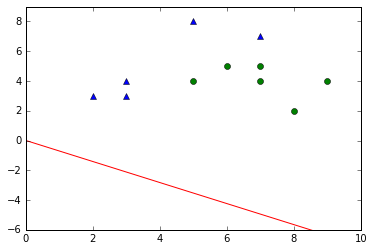

In [8]:
x_val = [x[0] for x in class1]
y_val = [x[1] for x in class1]
fig = plt.figure()
ax = fig.add_subplot('111')
ax.plot(x_val, y_val, '^')
x_val = [x[0] for x in class2]
y_val = [x[1] for x in class2]
ax.plot(x_val, y_val, 'o')
ax.plot([0, 0.817*12], [0, -0.577*12])
ax.set_ylim(-6, 9)

## Question 3

In [9]:
class_1 = np.array([[4, 2, 9],[3, 5, 4]])
class_2 = np.array([[2, 5, 1], [2, 2, 1]])

In [10]:
u1 = np.mean(class_1, axis=0)
u2 = np.mean(class_2, axis=0)
print u1
print u2

[3.500 3.500 6.500]
[2.000 3.500 1.000]


In [11]:
diff = u1-u2
diff = diff.reshape(3, 1)

In [12]:
B = diff.dot(diff.T)

$$B = \begin{bmatrix}2.25 & 0.0 & 8.25 \\0.0 & 0.0 & 0.0 \\8.25 & 0.0 & 30.25 \\
\end{bmatrix}$$

### within class scatter matrices

In [13]:
centered_1 = class_1 - u1
s1 = centered_1.T.dot(centered_1)

In [14]:
centered_2 = class_2 - u2
s2 = centered_2.T.dot(centered_2)

$$S_1 = \begin{bmatrix}0.5 & -1.5 & 2.5 \\-1.5 & 4.5 & -7.5 \\2.5 & -7.5 & 12.5 \\\end{bmatrix}
S_2 = \begin{bmatrix}0.0 & 0.0 & 0.0 \\0.0 & 4.5 & 0.0 \\0.0 & 0.0 & 0.0 \\\end{bmatrix}$$

In [15]:
s = s1 + s2

$$ S = \begin{bmatrix}0.5 & -1.5 & 2.5 \\-1.5 & 9.0 & -7.5 \\2.5 & -7.5 & 12.5 \\\end{bmatrix}$$

The matrix $S$ should be a singular matrix since the number of instances in each class is less than the number of dimensions. We can verify this by calculating the determinant of $S$ which turns out to be $1.56125112838e-15$, a very small number that is almost zero but is not due to floating point precision. We can continue our calculations based on this result. I believe that the resulting eigenvectors will be a close estimate of the real value. In reality however, we should perform dimensionality reduction using PCA to reduce the number of dimensions $d$ such that it becomes less than the number of instances in each class, so that the we can perform LDA and end up with a nonsingular $S$ matrix.

In [16]:
# The determinant is almost 0 and the matrix is singular
print linalg.det(s)

1.56125112838e-15


### LDA direction

In [17]:
evalues, evectors = linalg.eig(linalg.inv(s).dot(B))

$$ eigenvalues = \begin{bmatrix}0.000 & 5764607523034250.000 & -6.000
\end{bmatrix}$$

$$eigenvectors = \begin{bmatrix}0.0 & 0.980 & -0.964 \\1.0 & 8.860e-17 & 1.862e-18 \\0.0 & -0.196 & 0.263 \\\end{bmatrix}$$

$w$ is the eigenvector corresponding to eigenvalue of the highest value.

$$ w = \begin{bmatrix} 0.981 \\ 0 \\ -0.196\end{bmatrix}$$

My hypothesis is that the point on $w$ that best separates the two classes is the point midway between the projected means of the two classes on $w$.

In [18]:
w = evectors[:,1]
m1 = w.T.dot(u1)
m2 = w.T.dot(u2)
print m1, m2

midpoint = (m1 + m2)/2
print midpoint

2.15727748652 1.76504521624
1.96116135138


The projected means, $m1 = 2.157$ and $m2 = 1.765$ are the offset from $(0,0)$ along the line $w$. The midpoint is therefore $\frac{m_1 + m_2}{2} = 1.961$

## Midterm Question

In [19]:
class_1 = np.array([[1, 1], [2, 1],[1, 2]])
class_2 = np.array([[2, 2], [3, 2]])

### mean vector and between class scatter matrix

In [20]:
u1 = np.mean(class_1, axis=0)
u2 = np.mean(class_2, axis=0)

$$u_1 = \begin{bmatrix}1.333 \\1.333 \\\end{bmatrix} $$

$$u_2 = \begin{bmatrix}2.5 \\2.0 \\\end{bmatrix} $$

In [21]:
diff = u1 - u2
diff.reshape(2, 1)
B = diff.dot(diff.T)

$$ B = \begin{bmatrix}1.361 & 0.777 \\0.777 & 0.444 \\\end{bmatrix} $$

### within class scatter matrices

In [22]:
centered_1 = class_1 - u1
s1 = centered_1.T.dot(centered_1)

In [23]:
centered_2 = class_2 - u2
s2 = centered_2.T.dot(centered_2)

$$ S_1= \begin{bmatrix}0.666 & -0.333 \\-0.333 & 0.666 \\\end{bmatrix}
S_2 = \begin{bmatrix}0.5 & 0.0 \\0.0 & 0.0 \\\end{bmatrix}$$

In [24]:
s = s1 + s2
print linalg.det(s)

0.666666666667


$$ S = \begin{bmatrix}1.166 & -0.333 \\-0.333 & 0.666 \\\end{bmatrix} $$

### plotting the best discriminant

In [25]:
evalues, evectors = linalg.eig(linalg.inv(s).dot(B))
print evalues
print evectors
w = evectors[:,1]

[1.354 3.611]
[[-0.894 -0.447]
 [0.447 -0.894]]


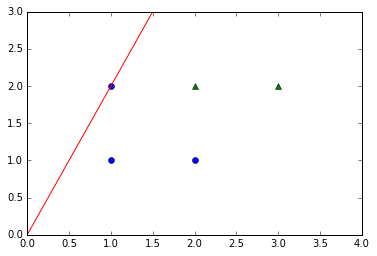

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(class_1[:,0], class_1[:,1], 'o')
ax.plot(class_2[:,0], class_2[:,1], '^')
ax.set_xlim(0, 4)
ax.set_ylim(0, 3)
# a hack to plot the part on the line in the first quadrant
ax.plot([0,-0.447 * -10], [0, -0.894 * -10])